In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# 1 Загрузка файла с данными

In [30]:
raw_df = pd.read_csv('data_breast.csv')
raw_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 2 Основеые статические показатели

In [31]:
raw_df.mean()

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [32]:
raw_df.min()

id                              8670
diagnosis                          B
radius_mean                    6.981
texture_mean                    9.71
perimeter_mean                 43.79
area_mean                      143.5
smoothness_mean              0.05263
compactness_mean             0.01938
concavity_mean                     0
concave points_mean                0
symmetry_mean                  0.106
fractal_dimension_mean       0.04996
radius_se                     0.1115
texture_se                    0.3602
perimeter_se                   0.757
area_se                        6.802
smoothness_se               0.001713
compactness_se              0.002252
concavity_se                       0
concave points_se                  0
symmetry_se                 0.007882
fractal_dimension_se       0.0008948
radius_worst                    7.93
texture_worst                  12.02
perimeter_worst                50.41
area_worst                     185.2
smoothness_worst             0.07117
c

In [33]:
raw_df.max()

id                         911320502
diagnosis                          M
radius_mean                    28.11
texture_mean                   39.28
perimeter_mean                 188.5
area_mean                       2501
smoothness_mean               0.1634
compactness_mean              0.3454
concavity_mean                0.4268
concave points_mean           0.2012
symmetry_mean                  0.304
fractal_dimension_mean       0.09744
radius_se                      2.873
texture_se                     4.885
perimeter_se                   21.98
area_se                        542.2
smoothness_se                0.03113
compactness_se                0.1354
concavity_se                   0.396
concave points_se            0.05279
symmetry_se                  0.07895
fractal_dimension_se         0.02984
radius_worst                   36.04
texture_worst                  49.54
perimeter_worst                251.2
area_worst                      4254
smoothness_worst              0.2226
c

In [34]:
raw_df.std()

id                         1.250206e+08
radius_mean                3.524049e+00
texture_mean               4.301036e+00
perimeter_mean             2.429898e+01
area_mean                  3.519141e+02
smoothness_mean            1.406413e-02
compactness_mean           5.281276e-02
concavity_mean             7.971981e-02
concave points_mean        3.880284e-02
symmetry_mean              2.741428e-02
fractal_dimension_mean     7.060363e-03
radius_se                  2.773127e-01
texture_se                 5.516484e-01
perimeter_se               2.021855e+00
area_se                    4.549101e+01
smoothness_se              3.002518e-03
compactness_se             1.790818e-02
concavity_se               3.018606e-02
concave points_se          6.170285e-03
symmetry_se                8.266372e-03
fractal_dimension_se       2.646071e-03
radius_worst               4.833242e+00
texture_worst              6.146258e+00
perimeter_worst            3.360254e+01
area_worst                 5.693570e+02


# 3 выбрать стратегию для работы с пропущенными данными

In [35]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

В наборе данных нет пропусков, столбец Unnamed: 32 пустой его нужно удалить

In [36]:
raw_df = raw_df.drop(['Unnamed: 32'], axis=1)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Расчитать корреляционную матрицу

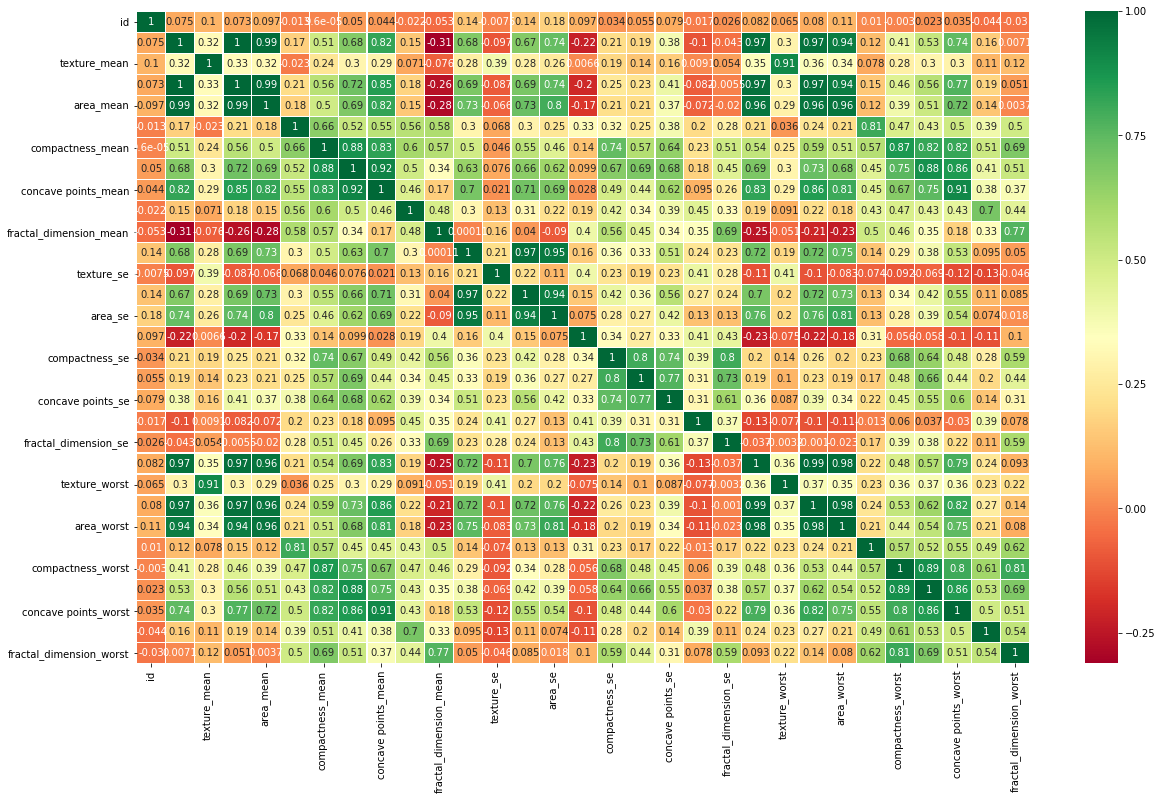

In [37]:
sns.heatmap(raw_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# Взаимосвязи между переменными

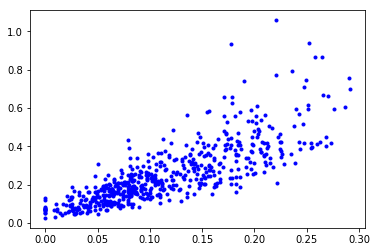

In [38]:
plt.plot(raw_df['concave points_worst'], raw_df['compactness_worst'], 'b.')

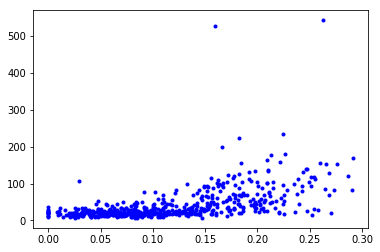

In [39]:
plt.plot(raw_df['concave points_worst'], raw_df['area_se'], 'b.')

# Feature Selection

In [40]:
raw_df = pd.get_dummies(raw_df, columns = ['diagnosis'],
                             prefix=['diagnosis'])
raw_df = raw_df.drop('diagnosis_B', axis = 1)
raw_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [43]:
corr_matrix = raw_df.drop(['diagnosis_M'], axis=1).corr().abs()

# выбирается верхний треугольник матрицы корелляций
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# найдем индексы колонок с корелляцией больше чем 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


# предсказать переменную ”Diagnosis ”

In [44]:
cl_ids_test = np.random.choice(raw_df.id, size=100, replace=False)
cl_ids_test_set = set(cl_ids_test)

# create transactions dataset for train
df_train = raw_df[~raw_df.id.isin(cl_ids_test)].copy()
print("Total in train dataset: ", len(df_train))
# create transactions dataset for test
df_test = raw_df[raw_df.id.isin(cl_ids_test)].copy()
print("Total in test dataset: ", len(df_test))

Total in train dataset:  469
Total in test dataset:  100


In [45]:
X_test = df_test.drop(['diagnosis_M'], axis=1)
#X_test = X_test.drop(X_test[to_drop], axis=1)
y_test = df_test['diagnosis_M']

X_train = df_train.drop(['diagnosis_M'], axis=1)
#X_train = X_train.drop(X_train[to_drop], axis=1)
y_train = df_train['diagnosis_M']

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [47]:
cols = list(filter(lambda x: x in X_test.columns, X_train.columns))

In [48]:
clf = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=0).fit(X_train[cols], y_train)

In [49]:
y_train_predict = clf.predict_proba(X_train[cols])[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  1.0


In [50]:
y_test_predict = clf.predict_proba(X_test[cols])[:, 1]


roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)

Test:  0.99
